In [1]:
import os
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np

In [148]:
splits_dir = '/root/data_alfred/splits/'
original_data_dir = '/root/data_alfred/json_feat_2.1.0_backup_20200826_agent_training/train/'
augmentation_data_dir = '/root/data_alfred/unlabeled_12k_20201206/seen'

original_split_file = 'oct21.json'
new12k_split_file = 'data_augmentation_experiment1_20201230.json'
partial_split_file = 'data_augmentation_experiment1_20200826.json'

results_dir = '/root/home/hoyeung/blob_alfred_data/exp_all'

In [9]:
baseline_dir = 'model:seq2seq_im_mask,name:experiment_1_original_train_set_plus_12k_successes_annotated_by_baseline'
explainer_dir = 'model:seq2seq_im_mask,name:experiment_1_original_train_set_plus_12k_successes_annotated_by_explainer'
explainer_full_dir = 'model:seq2seq_im_mask,name:experiment_1_original_train_set_plus_12k_successes_annotated_by_explainer_full'

## Scene Number Distribution

In [45]:
def get_scenes(split):
    scenes = []
    for task in split:
        scenes.append(task['task'].split('/')[0].split('-')[-1])
    return scenes

def read_split(splits_dir, split_file):
    with open(os.path.join(splits_dir, split_file), 'r') as f:
        splits = json.load(f)
    return splits

In [158]:
original_split_tr = read_split(splits_dir, original_split_file)['train']
partial_split_tr = read_split(splits_dir, partial_split_file)['augmentation']
new12k_split_tr = read_split(splits_dir, new12k_split_file)['augmentation']

In [57]:
original_split_file == partial_split_file

False

In [58]:
scenes_original_tr = get_scenes(original_split_tr)
scenes_partial_tr = get_scenes(partial_split_tr)
scenes_new12_tr = get_scenes(new12k_split_tr)

In [59]:
all_scenes = set(scenes_original_tr) |set(scenes_partial_tr) |set(scenes_new12_tr)
scene_ordered_by_original_counts = list(Counter(get_scenes(original_split_tr)).most_common())
scene_ordered_by_original_counts = [x for x,y in scene_ordered_by_original_counts]

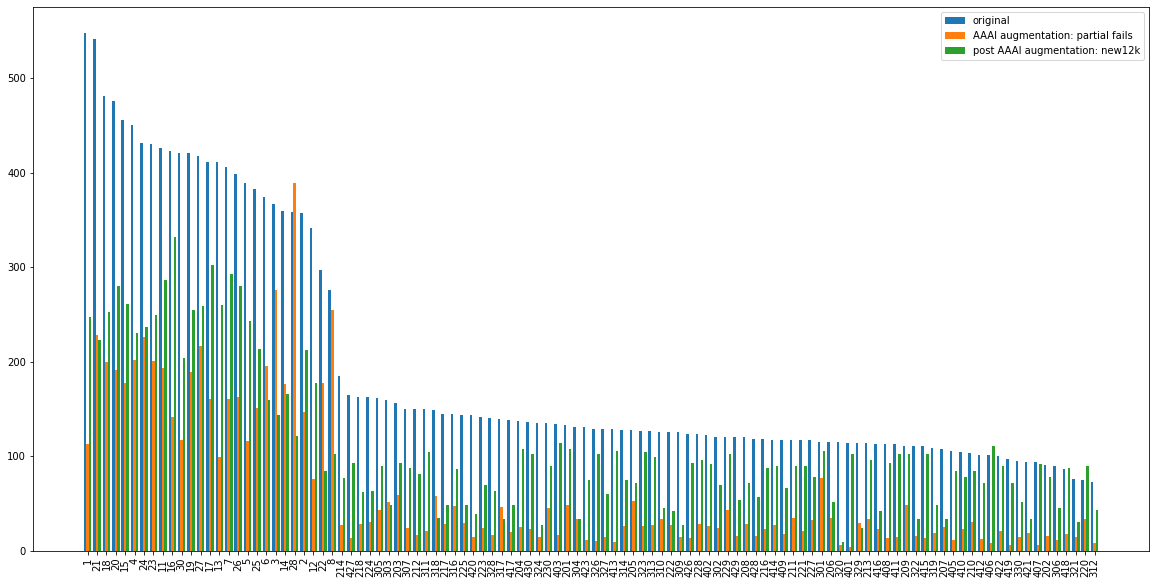

In [60]:
scenes = scene_ordered_by_original_counts
ct_original = [Counter(scenes_original_tr)[s] for s in scenes]
ct_partial = [Counter(scenes_partial_tr)[s] for s in scenes]
ct_new12k = [Counter(scenes_new12_tr)[s] for s in scenes]

def subcategorybar(scenes, vals, legends, width=0.8):
    n = len(vals)
    _scenes = np.arange(len(scenes))
    plt.figure(figsize=(20,10))
    for i in range(n):
        plt.bar(_scenes - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", label=legends[i])
    plt.xticks(rotation=90)
    plt.xticks(_scenes, scenes)
    plt.legend()
    
subcategorybar(scenes, [ct_original,ct_partial,ct_new12k], ['original', 'AAAI augmentation: partial fails', 'post AAAI augmentation: new12k'])

plt.show()

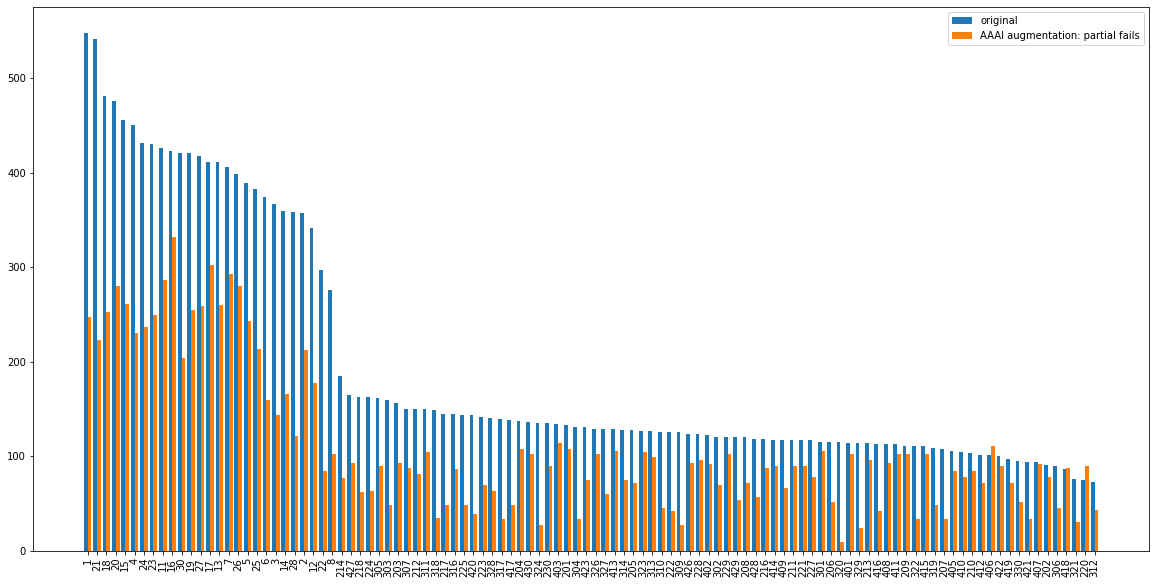

In [112]:
subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'AAAI augmentation: partial fails', 'post AAAI augmentation: new12k'])

plt.show()

## Task Type by Scene Number

In [70]:
scenes_high = scene_ordered_by_original_counts[:27]
scenes_low = scene_ordered_by_original_counts[27:]

In [123]:
def count_tasks(split):
    new = []
    scene_high_task_types = defaultdict(lambda: defaultdict(int))
    scene_low_task_types = defaultdict(lambda: defaultdict(int))
    all_scenes = defaultdict(lambda: defaultdict(int)) 
    for task in split:
        scene_num = task['task'].split('/')[0].split('-')[-1]
        task_type = task['task'].split('-')[0]
        if str(scene_num) in scenes_high:
            scene_high_task_types[task_type][scene_num] += 1
        else:
            if not str(scene_num) in scenes_low: 
                new.append(scene_num)
            scene_low_task_types[task_type][scene_num] += 1
        all_scenes[task_type][scene_num] += 1
    return scene_high_task_types, scene_low_task_types, all_scenes, new

In [124]:
print('Original')
original_scene_high_task_types, original_scene_low_task_types, original_all_scenes, original_new = count_tasks(original_split_tr)
print('Partial')
partial_scene_high_task_types, partial_scene_low_task_types, partial_all_scenes, partial_new = count_tasks(partial_split_tr)
print('New 12k')
new12k_scene_high_task_types, new12k_scene_low_task_types, new12k_all_scenes, new12k_new = count_tasks(new12k_split_tr)

Original
Partial
New 12k


In [113]:
len(partial_new)

621

In [117]:
len(scenes_partial_tr)

7570

In [102]:
set(original_new)

set()

In [120]:
# Datapoints got leaked!
get_scenes(read_split(splits_dir, original_split_file)['valid_unseen'])

['219',
 '219',
 '219',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '219',
 '219',
 '219',
 '308',
 '308',
 '308',
 '308',
 '308',
 '308',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '219',
 '219',
 '219',
 '10',
 '10',
 '10',
 '424',
 '424',
 '424',
 '308',
 '308',
 '308',
 '10',
 '10',
 '10',
 '219',
 '219',
 '219',
 '219',
 '219',
 '219',
 '219',
 '219',
 '219',
 '219',
 '219',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '219',
 '219',
 '219',
 '219',
 '219',
 '219',
 '424',
 '424',
 '424',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '219',
 '219',
 '219',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '219',
 '219',
 '219',
 '308',
 '308',
 '308',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '219',
 '219',
 '219',
 '10',
 '10',
 '10',
 '10',
 '

In [104]:
read_split(splits_dir, original_split_file).keys()

dict_keys(['tests_seen', 'tests_unseen', 'train', 'valid_seen', 'valid_unseen'])

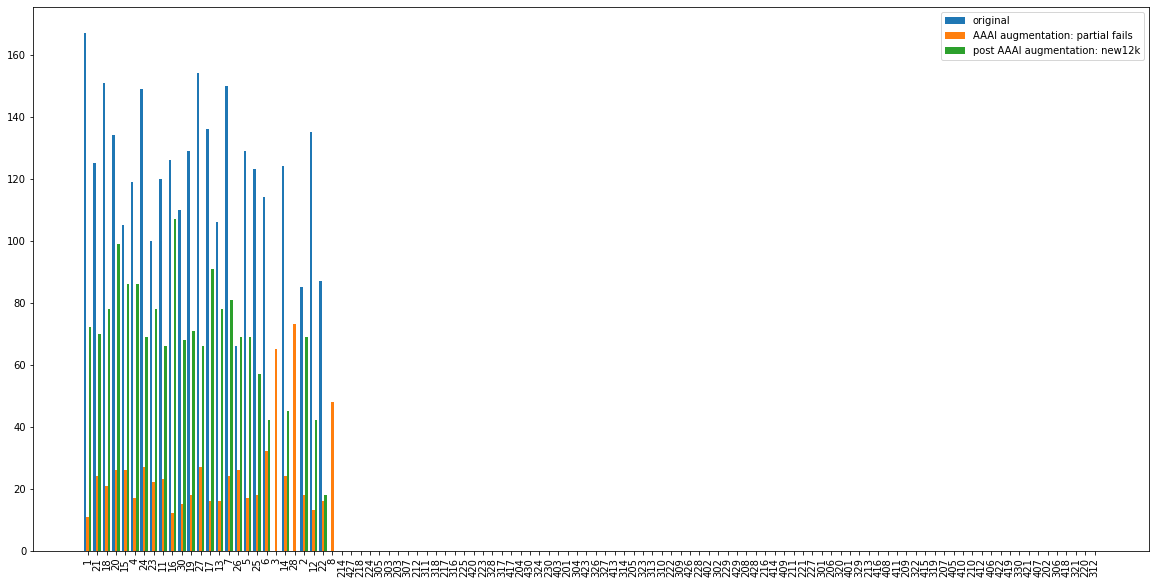

In [132]:
k = 'pick_cool_then_place_in_recep'
scenes = scene_ordered_by_original_counts
ct_original = [original_all_scenes[k][s] for s in scenes]
ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_all_scenes[k][s] for s in scenes]  

subcategorybar(scenes, [ct_original,ct_partial,ct_new12k], ['original', 'AAAI augmentation: partial fails', 'post AAAI augmentation: new12k'])
plt.show()

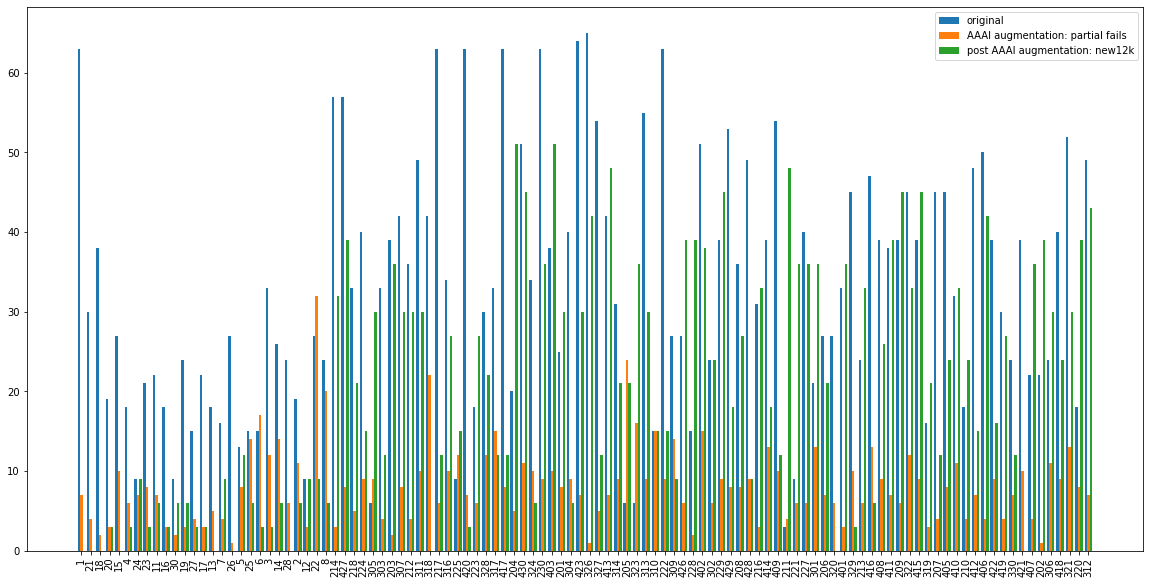

In [131]:
k = 'pick_two_obj_and_place'
scenes = scene_ordered_by_original_counts
ct_original = [original_all_scenes[k][s] for s in scenes]
ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_all_scenes[k][s] for s in scenes]  

subcategorybar(scenes, [ct_original,ct_partial,ct_new12k], ['original', 'AAAI augmentation: partial fails', 'post AAAI augmentation: new12k'])
plt.show()

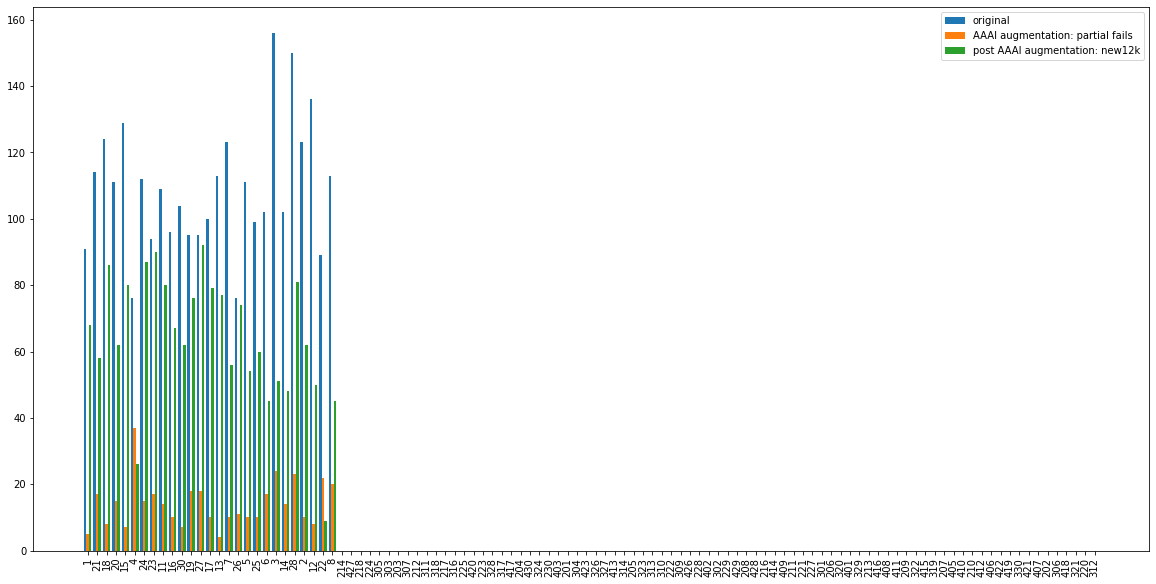

In [133]:
k = 'pick_heat_then_place_in_recep'
scenes = scene_ordered_by_original_counts
ct_original = [original_all_scenes[k][s] for s in scenes]
ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_all_scenes[k][s] for s in scenes]  

subcategorybar(scenes, [ct_original,ct_partial,ct_new12k], ['original', 'AAAI augmentation: partial fails', 'post AAAI augmentation: new12k'])
plt.show()

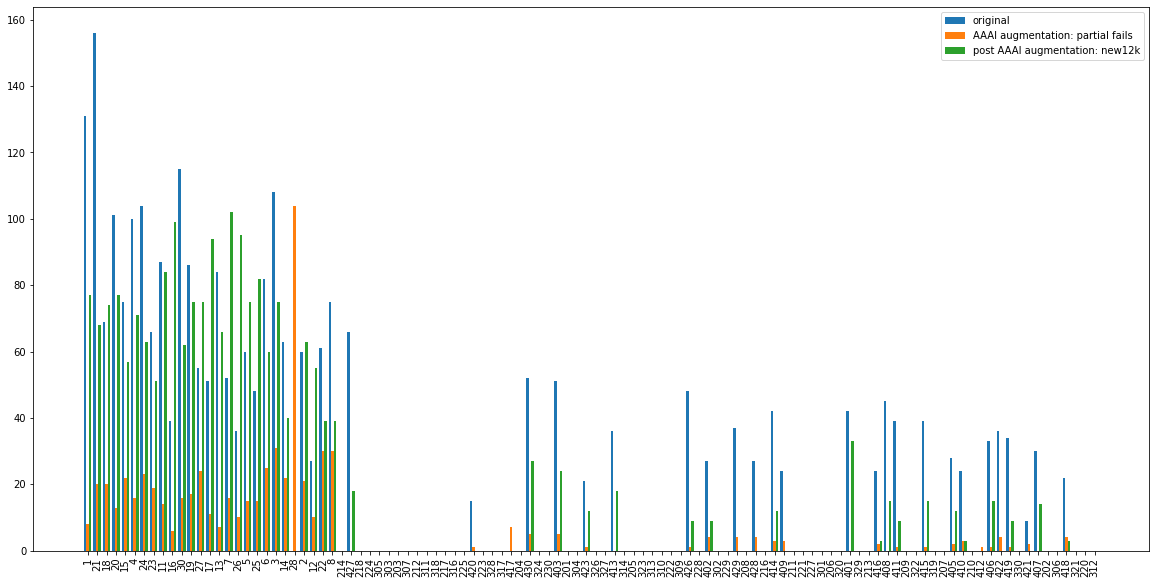

In [134]:
k = 'pick_clean_then_place_in_recep'
scenes = scene_ordered_by_original_counts
ct_original = [original_all_scenes[k][s] for s in scenes]
ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_all_scenes[k][s] for s in scenes]  

subcategorybar(scenes, [ct_original,ct_partial,ct_new12k], ['original', 'AAAI augmentation: partial fails', 'post AAAI augmentation: new12k'])
plt.show()

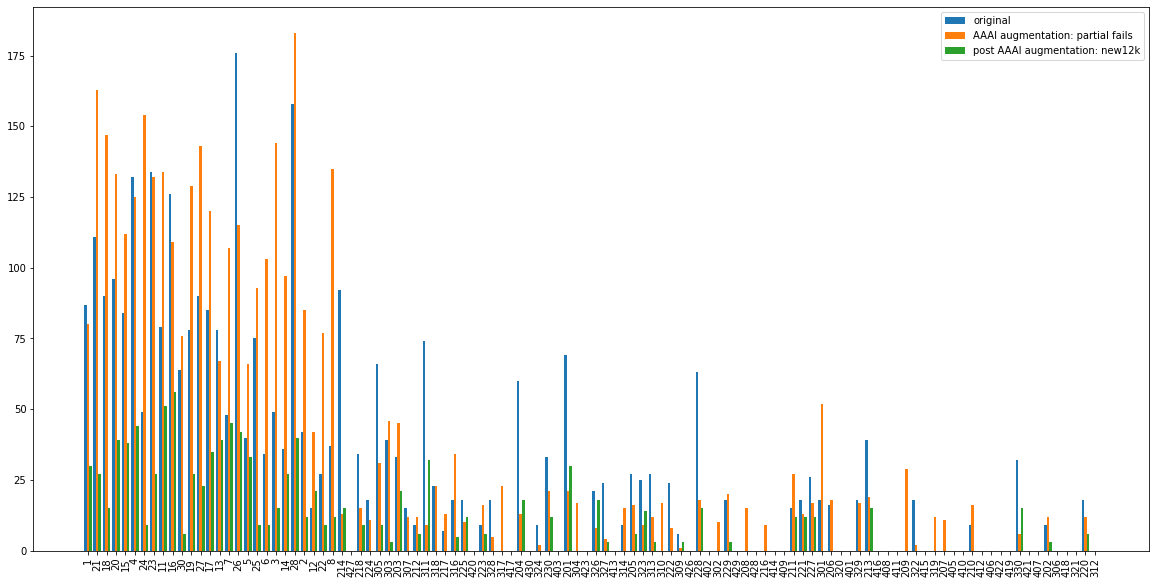

In [135]:
k = 'pick_and_place_with_movable_recep'
scenes = scene_ordered_by_original_counts
ct_original = [original_all_scenes[k][s] for s in scenes]
ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_all_scenes[k][s] for s in scenes]  

subcategorybar(scenes, [ct_original,ct_partial,ct_new12k], ['original', 'AAAI augmentation: partial fails', 'post AAAI augmentation: new12k'])
plt.show()

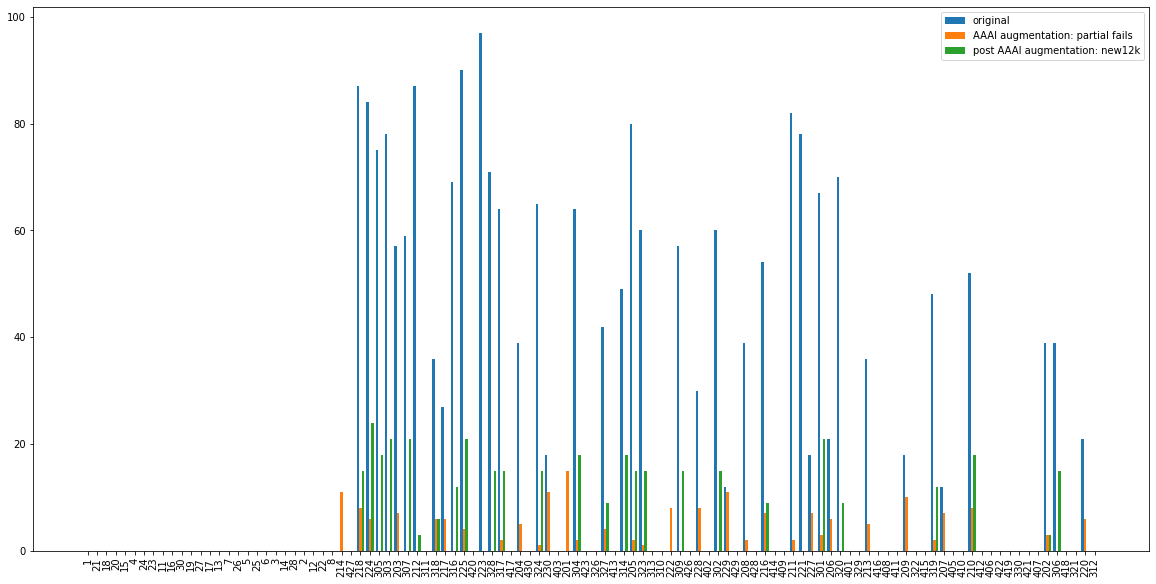

In [136]:
k = 'look_at_obj_in_light'
scenes = scene_ordered_by_original_counts
ct_original = [original_all_scenes[k][s] for s in scenes]
ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_all_scenes[k][s] for s in scenes]  

subcategorybar(scenes, [ct_original,ct_partial,ct_new12k], ['original', 'AAAI augmentation: partial fails', 'post AAAI augmentation: new12k'])
plt.show()

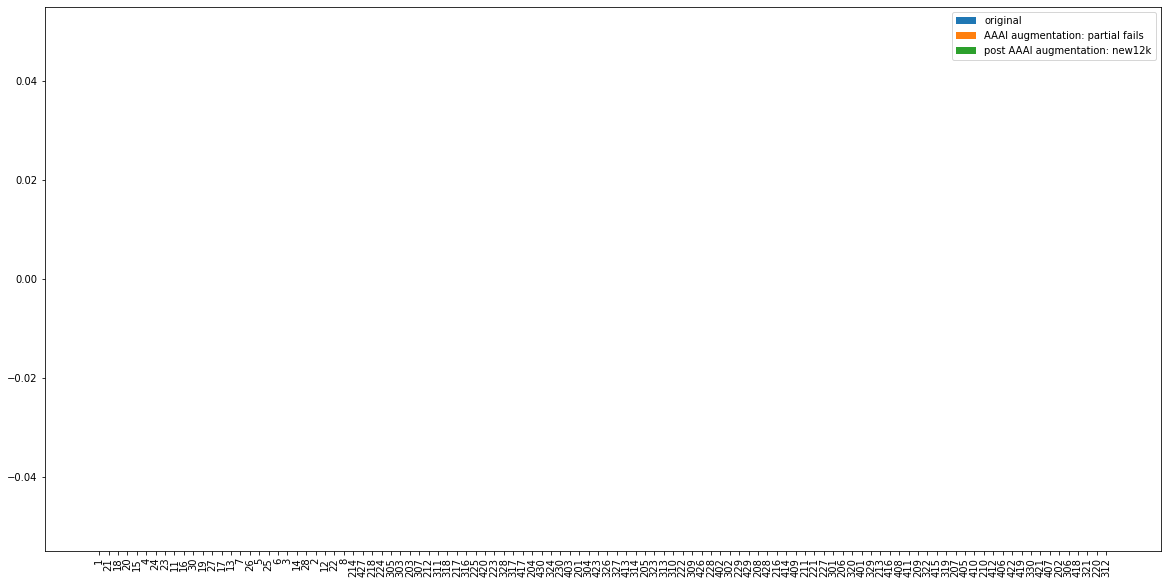

In [137]:
k = 'CoolObject'
scenes = scene_ordered_by_original_counts
ct_original = [original_all_scenes[k][s] for s in scenes]
ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_all_scenes[k][s] for s in scenes]  

subcategorybar(scenes, [ct_original,ct_partial,ct_new12k], ['original', 'AAAI augmentation: partial fails', 'post AAAI augmentation: new12k'])
plt.show()

In [129]:
original_all_scenes.keys()

dict_keys(['pick_cool_then_place_in_recep', 'pick_two_obj_and_place', 'pick_heat_then_place_in_recep', 'pick_clean_then_place_in_recep', 'pick_and_place_simple', 'pick_and_place_with_movable_recep', 'look_at_obj_in_light', 'CoolObject'])

## Task Type by individual subgoals

In [70]:
scenes_high = scene_ordered_by_original_counts[:27]
scenes_low = scene_ordered_by_original_counts[27:]

In [204]:
def count_tasks(split, data_dir):
    leaked = []
    scene_high_task_types = defaultdict(lambda: defaultdict(int))
    scene_low_task_types = defaultdict(lambda: defaultdict(int))
    scene_high_subgoal_types = defaultdict(lambda: defaultdict(int))
    scene_low_subgoal_types = defaultdict(lambda: defaultdict(int))
    scene_high_action_types = defaultdict(lambda: defaultdict(int))
    scene_low_action_types = defaultdict(lambda: defaultdict(int))
    
    all_scenes_task_types = defaultdict(lambda: defaultdict(int)) 
    all_scenes_subgoal_types = defaultdict(lambda: defaultdict(int)) 
    all_scenes_action_types = defaultdict(lambda: defaultdict(int)) 
    
    
    for task in split:
        scene_num = task['task'].split('/')[0].split('-')[-1]
        task_type = task['task'].split('-')[0]
        
        # find the list of subgoals for this task
        traj_p = os.path.join(data_dir, task['task'], 'traj_data.json')
        with open(traj_p, 'r') as f:
            traj_data = json.load(f)
        
        num_subgoals = len(traj_data['plan']['high_pddl'])
        subgoals = defaultdict(int)
        for i in range(num_subgoals):
            subgoal = traj_data['plan']['high_pddl'][i]['discrete_action']['action']
            subgoals[subgoal] += 1
            
        num_actions = len(traj_data['plan']['low_actions'])
        actions = defaultdict(int)
        for i in range(num_actions):
            action = traj_data['plan']['low_actions'][i]['discrete_action']['action']
            actions[action] += 1
#         print(task['task'].split('/')[0].split('-')[-1], actions.keys())
        
        if str(scene_num) in scenes_high:
            scene_high_task_types[task_type][scene_num] += 1
            
            for subgoal in subgoals:
                all_scenes_subgoal_types[subgoal][scene_num] += 1
                scene_high_subgoal_types[subgoal][scene_num] += subgoals[subgoal]

            for action in actions:
                scene_high_action_types[action][scene_num] += actions[action]
                all_scenes_action_types[action][scene_num] += 1
        else:
            if not str(scene_num) in scenes_low: 
                leaked.append(scene_num)
            scene_low_task_types[task_type][scene_num] += 1
        
            for subgoal in subgoals:
                all_scenes_subgoal_types[subgoal][scene_num] += 1
                scene_low_subgoal_types[subgoal][scene_num] += subgoals[subgoal]        

            for action in actions:
                scene_low_action_types[action][scene_num] += actions[action]
                all_scenes_action_types[action][scene_num] += 1
    
        all_scenes_task_types[task_type][scene_num] += 1

    return {
        'all_scenes_task_types':all_scenes_task_types,
        'all_scenes_subgoal_types':all_scenes_subgoal_types,
        'all_scenes_action_types':all_scenes_action_types,
        'scene_high_task_types':scene_high_task_types,
        'scene_low_task_types':scene_low_task_types,
        'scene_high_subgoal_types':scene_high_subgoal_types,
        'scene_low_subgoal_types':scene_low_subgoal_types,
        'scene_high_action_types':scene_high_action_types,
        'scene_low_action_types':scene_low_action_types,
        'leaked_scenes':  leaked  }

In [205]:
print('Original')
original_aggregated = count_tasks(original_split_tr, original_data_dir)
# print('Partial')
# partial_aggregated = count_tasks(partial_split_tr, augmentation_data_dir)
print('New 12k')
new12k_aggregated = count_tasks(new12k_split_tr, augmentation_data_dir)

Original
New 12k


In [206]:
original_aggregated['all_scenes_action_types'].keys()

dict_keys(['LookDown_15', 'MoveAhead_25', 'RotateLeft_90', 'PickupObject', 'SliceObject', 'LookUp_15', 'RotateRight_90', 'OpenObject', 'PutObject', 'CloseObject', 'ToggleObjectOn', 'ToggleObjectOff'])

In [216]:
original_aggregated['all_scenes_subgoal_types'].keys()

dict_keys(['GotoLocation', 'PickupObject', 'SliceObject', 'PutObject', 'CoolObject', 'NoOp', 'HeatObject', 'CleanObject', 'ToggleObject'])

In [ ]:
# find bias and skew, why it affected the outcomes.

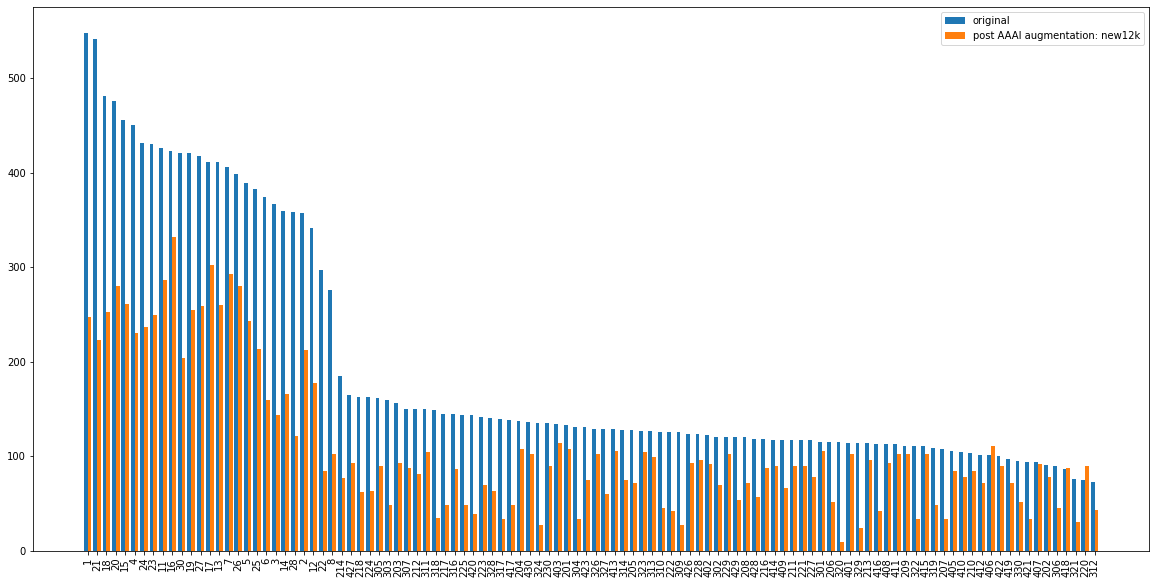

In [217]:
k = 'GotoLocation'
scenes = scene_ordered_by_original_counts
ct_original = [original_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]
# ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]

subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'post AAAI augmentation: new12k'])
plt.show()

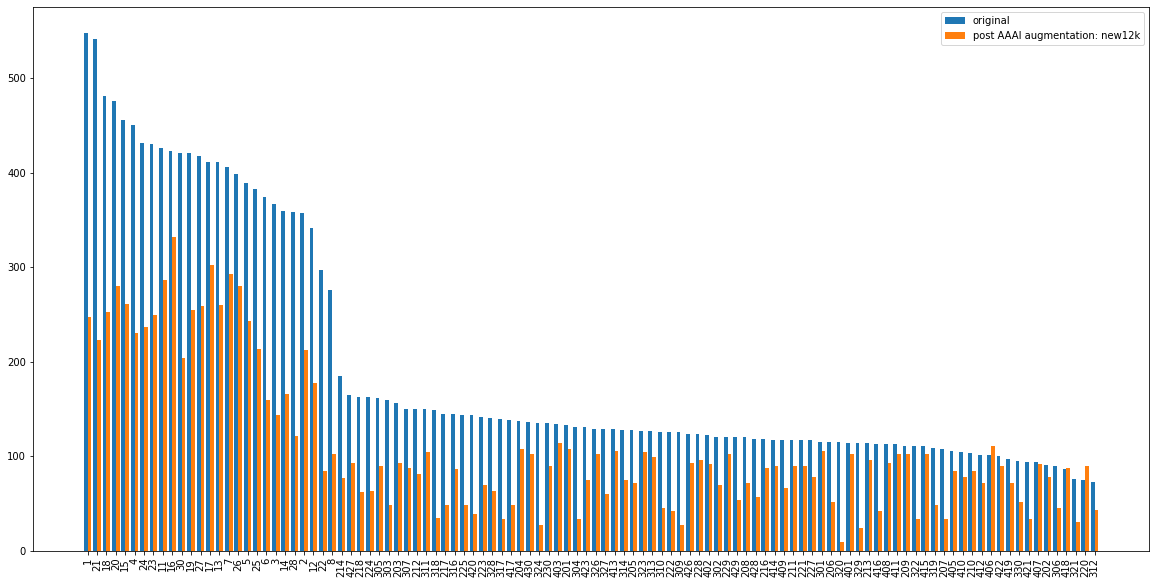

In [219]:
k = 'PickupObject'
scenes = scene_ordered_by_original_counts
ct_original = [original_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]
# ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]

subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'post AAAI augmentation: new12k'])
plt.show()

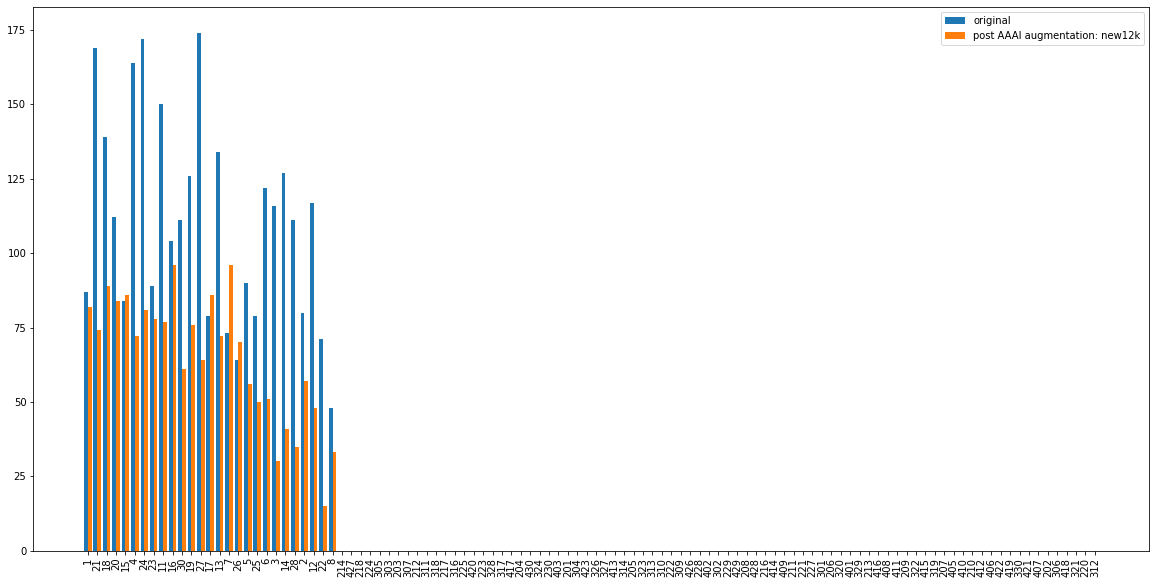

In [218]:
k = 'SliceObject'
scenes = scene_ordered_by_original_counts
ct_original = [original_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]
# ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]

subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'post AAAI augmentation: new12k'])
plt.show()

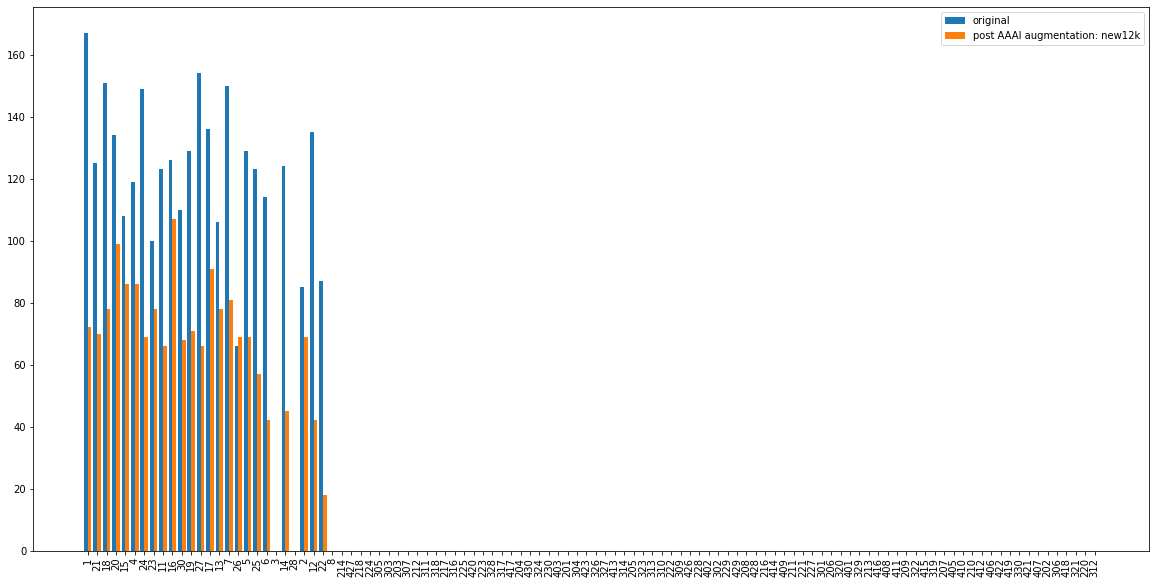

In [208]:
k = 'CoolObject'
scenes = scene_ordered_by_original_counts
ct_original = [original_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]
# ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]

subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'post AAAI augmentation: new12k'])
plt.show()

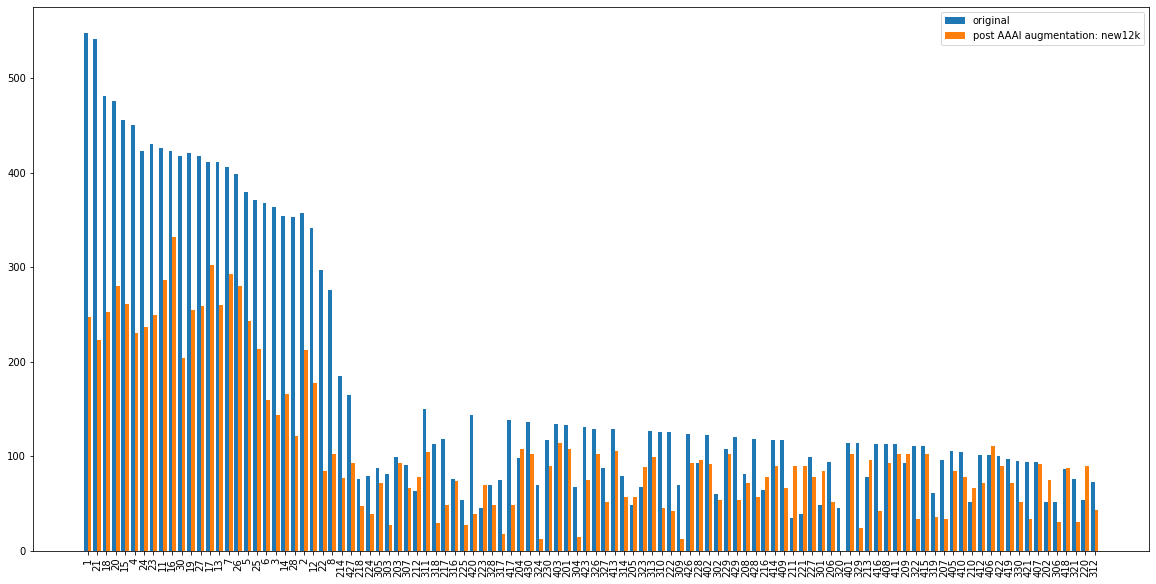

In [209]:
k = 'PutObject'
scenes = scene_ordered_by_original_counts
ct_original = [original_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]
# ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]

subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'post AAAI augmentation: new12k'])
plt.show()

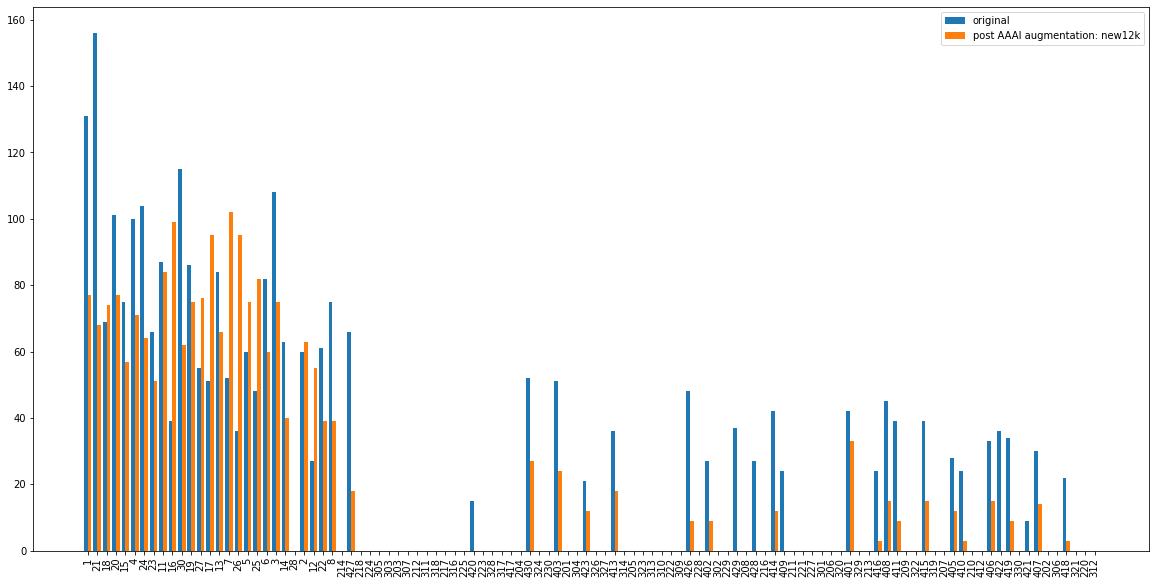

In [210]:
k = 'CleanObject'
scenes = scene_ordered_by_original_counts
ct_original = [original_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]
# ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]

subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'post AAAI augmentation: new12k'])
plt.show()

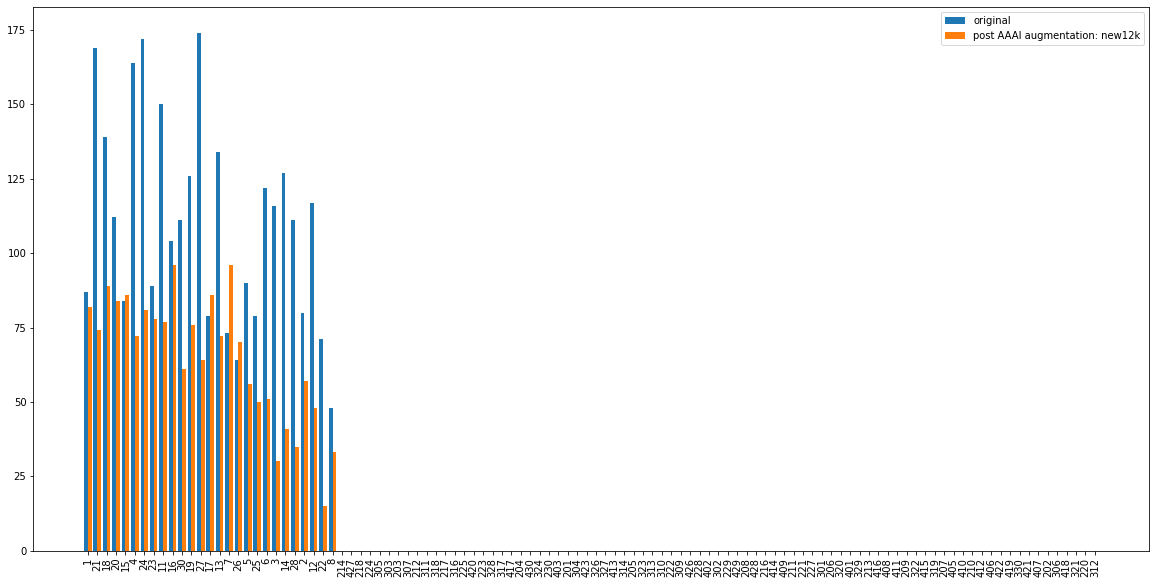

In [211]:
k = 'SliceObject'
scenes = scene_ordered_by_original_counts
ct_original = [original_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]
# ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]

subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'post AAAI augmentation: new12k'])
plt.show()

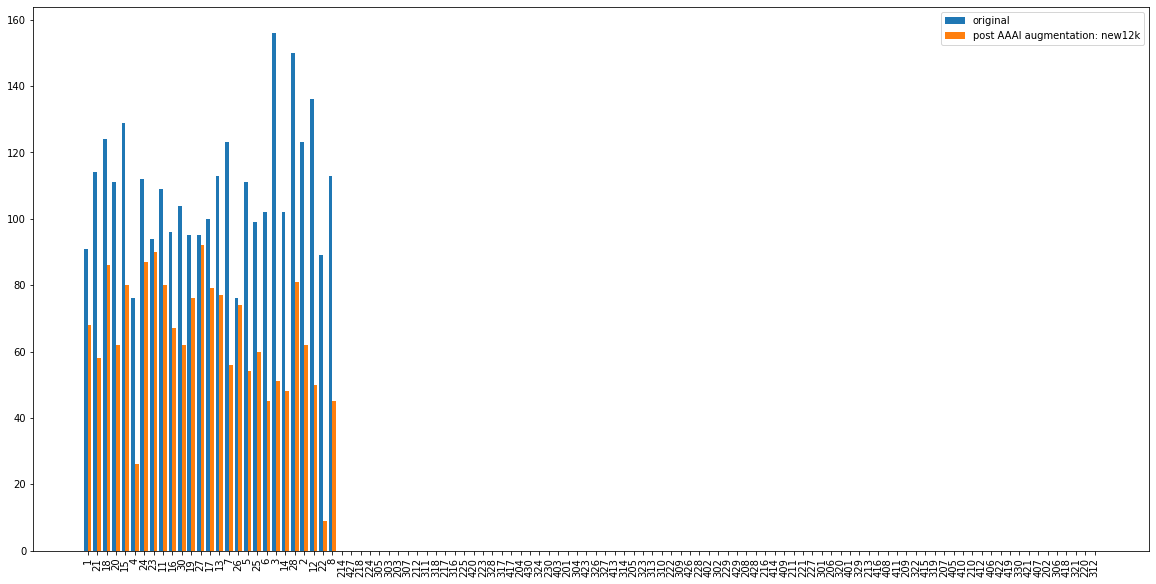

In [220]:
k = 'HeatObject'
scenes = scene_ordered_by_original_counts
ct_original = [original_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]
# ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_aggregated['all_scenes_subgoal_types'][k][s] for s in scenes]

subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'post AAAI augmentation: new12k'])
plt.show()

In [212]:
original_aggregated['all_scenes_action_types'].keys()

dict_keys(['LookDown_15', 'MoveAhead_25', 'RotateLeft_90', 'PickupObject', 'SliceObject', 'LookUp_15', 'RotateRight_90', 'OpenObject', 'PutObject', 'CloseObject', 'ToggleObjectOn', 'ToggleObjectOff'])

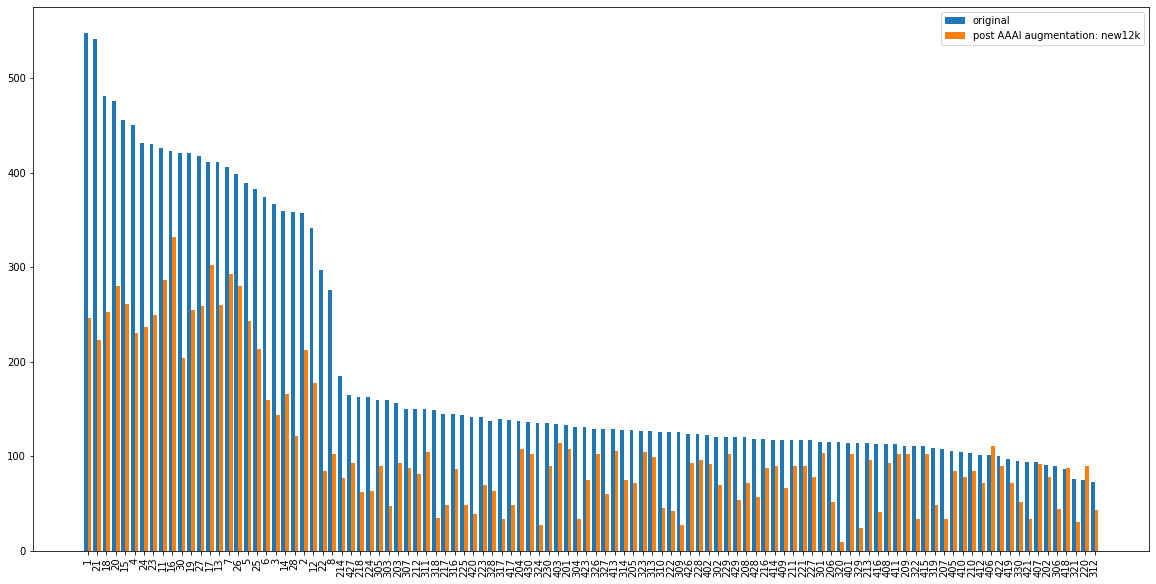

In [213]:
k = 'MoveAhead_25'
scenes = scene_ordered_by_original_counts
ct_original = [original_aggregated['all_scenes_action_types'][k][s] for s in scenes]
# ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_aggregated['all_scenes_action_types'][k][s] for s in scenes]

subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'post AAAI augmentation: new12k'])
plt.show()

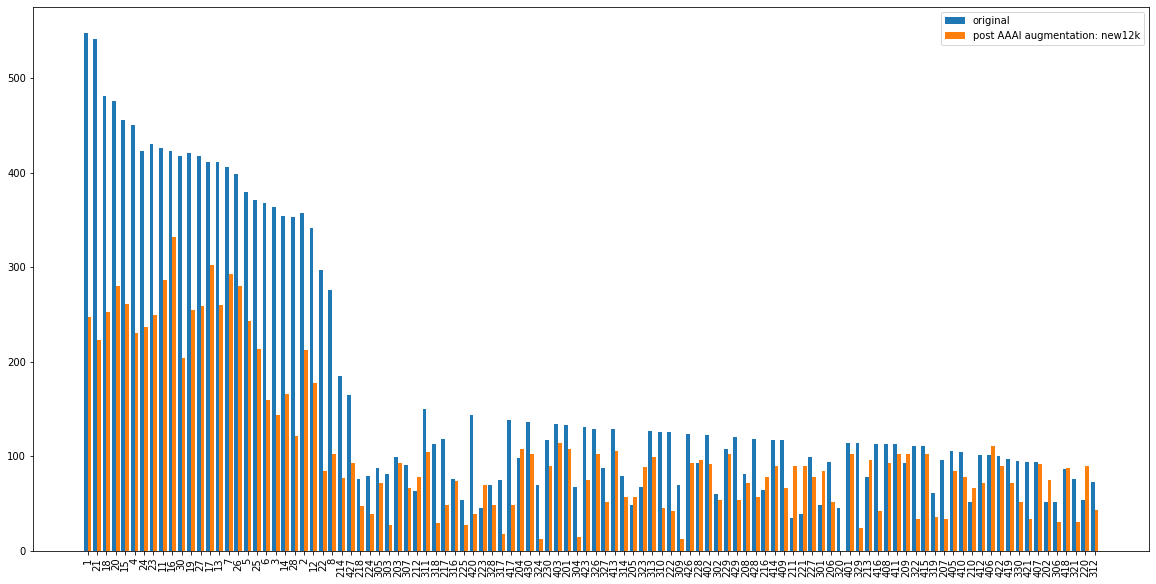

In [215]:
k = 'PutObject'
scenes = scene_ordered_by_original_counts
ct_original = [original_aggregated['all_scenes_action_types'][k][s] for s in scenes]
# ct_partial = [partial_all_scenes[k][s] for s in scenes] 
ct_new12k = [new12k_aggregated['all_scenes_action_types'][k][s] for s in scenes]

subcategorybar(scenes, [ct_original,ct_new12k], ['original', 'post AAAI augmentation: new12k'])
plt.show()

## Baseline

In [ ]:
subgoal_results_valid_seen_epoch15_20210122_163858_679781.json
